--------------------------------------------------
Original Image:


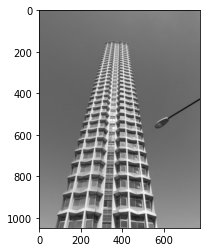

--------------------------------------------------
Filtered Image:


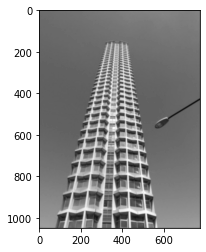

--------------------------------------------------
Reference Filtered Image:


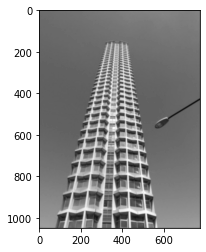

error: 1.9636557626235494e-14
image_idx:9 error:1.9636557626235494e-14
--------------------------------------------------
Original Image:


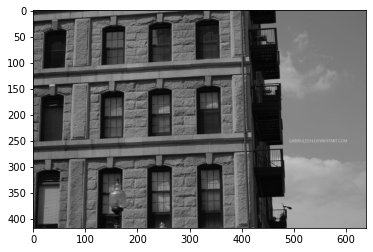

--------------------------------------------------
Filtered Image:


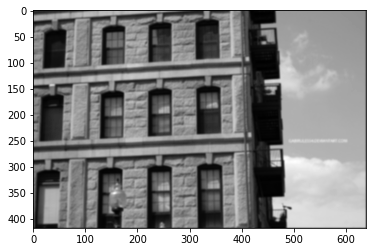

--------------------------------------------------
Reference Filtered Image:


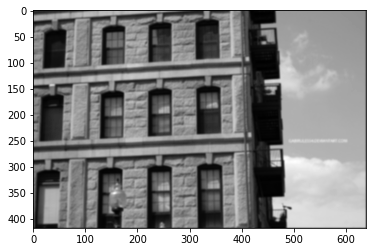

error: 1.9699778756697168e-14
image_idx:7 error:1.9699778756697168e-14


In [1]:
## DO NOT MODIFY! 
## Import from previous notebook
import nbimporter
from p1 import cv2, np, plt, math, SimpleNamespace
from p1 import get_parameters, Gauss2D, filter_image_vec
from p2 import edge_detection_nms
from p3 import hough_transform, peak_hough_lines

image_list, constants = get_parameters()

#----------------------------------------------------------------------
# Different from visualize in p3, calls hough_accumulator_nms()
def visualize(image_name, constants):
    image_rgb = cv2.cvtColor(cv2.imread(image_name), cv2.COLOR_BGR2RGB)
    print("-" * 50 + "\n" + "Original Image:")
    plt.imshow(image_rgb); plt.show() # Displaying the sample image
    
    image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
    image_m, image_o, image_x, image_y = edge_detection_nms(image, constants.sigma)
    print(np.any(image_m==0))
    
    print("-" * 50 + "\n" + "Edge Image:")
    plt.imshow(image_m, cmap="gray"); plt.show() # Displaying the sample image
    
    image_m_thres = 1.0*(image_m > constants.thres) # threshold the edge magnitude image
    print("-" * 50 + "\n" + "Thresholded Edge Image:")
    plt.imshow(image_m_thres, cmap="gray"); plt.show() # Displaying the sample image
    y_idxs, x_idxs = image_m_thres.nonzero() 
    print(x_idxs, y_idxs)
    
    #--------------hough transform----------------
    H, rho_arr, theta_arr = hough_transform(image_m, constants.thres, constants.rho_res, constants.theta_res)
    H = hough_accumulator_nms(H) # nms on H
    peak_rho_arr, peak_theta_arr = peak_hough_lines(H, rho_arr, theta_arr, constants.num_lines)
    vis_image_rgb = np.copy(image_rgb)
    vis_line_len = 3
    # 0.1 for pot
    for (x0, y0) in zip(x_idxs, y_idxs):
        for (rho, theta) in zip(peak_rho_arr, peak_theta_arr):
            if (abs(rho - (x0*np.cos(theta)+y0*np.sin(theta)))<0.1):
                x1 = int(x0 - vis_line_len*np.sin(theta)); y1 = int(y0 + vis_line_len*np.cos(theta))
                x2 = int(x0 + vis_line_len*np.sin(theta)); y2 = int(y0 - vis_line_len*np.cos(theta)); 
                cv2.line(vis_image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    plt.imshow(vis_image_rgb); plt.show() # Displaying the sample image


    
    #--------------vis----------------------------
    # vis_line_len = 100 # len of line in pixels, big enough to span the image
    # vis_image_rgb = np.copy(image_rgb)
    # for (rho, theta) in zip(peak_rho_arr, peak_theta_arr):
    #     x0 = rho*np.cos(theta); y0 = rho*np.sin(theta)
    #     for (x_idx, y_idx) in zip(x_idxs, y_idxs):
    #         if np.linalg.norm(np.asarray(x_idx, y_idx)-np.asarray(x0, y0))<5.0:
    #             pt = True
    #             break
    #         else:
    #             pt = False

    #     if pt: 
    #         print('here')
    #         x1 = int(x0 - vis_line_len*np.sin(theta)); y1 = int(y0 + vis_line_len*np.cos(theta))
    #         x2 = int(x0 + vis_line_len*np.sin(theta)); y2 = int(y0 - vis_line_len*np.cos(theta)); 
    #         cv2.line(vis_image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    # #---------------------------------------------
    # print("-" * 50 + "\n" + "Edge Image:")
    # plt.imshow(vis_image_rgb); plt.show() # Displaying the sample image
    
    return 

### Q4.1 Non-Maximal Suppression for the Hough Accumulator (5 points)

Write a function that modifies the accumulator H suppressing the neighboring lines

```
  def hough_accumulator_nms(H):
        
        return H_prime

```

- **Input**: *$H$* is the accumulator matrix (rhos x thetas),
- **Output**: *$H\_prime$* is the suppressed accumulator matrix (rhos x thetas),

**Instructions**
- Often for every locally maximal cell in H, there will probably be its neighboring cells which also score highly. 
- We wish to avoid the selection of these neighboring cells using non maximal suppression.
- This NMS step is different than the edge magnitude NMS performed earlier. 
- Here you will consider all the 8 neighbors of the pixel, not just the pixels lying along the gradient direction.
- If for one of the neighbor, H[pixel] < H[neighbor] then set H_prime[pixel] = 0



In [2]:
def hough_accumulator_nms(H):
    """Compute Hough Transform for the image

    Args:
        image_m: np.array, HxW, edge magnitude image.
        
    Returns:
        image_m_prime: np.array, HxW, suppressed edge magnitude image.
    """
    H_prime = np.copy(H) 
    H_pad = np.pad(H, 1)
    neighbor_offsets = [(dy, dx) for dy in range(-1, 2) for dx in range(-1, 2) if (dy != 0 or dx != 0)]
    # print(len(neighbor_offsets))
    ## directions are [-1,-1], [-1,1], [1,-1], [1,1]
    
    # compute supression mask per neighbour, 1 to suppress, 0 to keep
    # compare H and a part of H_pad, the part of H_pad can be obtained by moving H_pad using the neighbor_offsets
    # suppress_masks_per_neighbor = [? for (dy, dx) in neighbor_offsets]
    # YOUR CODE HERE
    # raise NotImplementedError()
    for i in range(H.shape[0]):
        for j in range(H.shape[1]):
            suppress_masks_per_neighbor = [1 if H_pad[i+1+dx, j+1+dy]>H[i,j] else 0 for (dy, dx) in neighbor_offsets]
            if np.amax(suppress_masks_per_neighbor)==1:
                H_prime[i,j] = 0


    # suppress_mask = np.logical_or.reduce(suppress_masks_per_neighbor) # 1 to suppress, 0 to keep
    # H_prime[suppress_mask] = 0
    
    return H_prime

### Q4.2 Line Segments for Visualization (15 points)

Write a function that visualizes the line segments (unlike the infinite lines from the function provided) on the image 
Note, this question will not be autograded but manually graded. Please submit the visualization of all 10 images into your writeup for full credit.

```
  def visualize_line_segments(image_name, constants):
        
        return vis_image_rgb

```

- **Input**: *$image\_name$* is the image path of input image, *$constants$ are the hyperparameters*.
- **Output**: *$vis\_image\_rgb$* is the visualized image containing line segments.

**Instructions**
- For each pixel, if it belongs to an edge, for all lines passing through the pixel, try fitting a fixed length small line segment centered at the pixel and match it with the line.
- If the pixel passes this check, draw the fixed small line segment on the image.

**Grading** Manually done for all the 10 images in the data folder.

In [3]:
def hough_egde_match(image_m, thres, rho_res, theta_res, peak_rho_arr, peak_theta_arr, rho_arr, theta_arr):
    """Compute Hough Transform for the image

    Args:
        image_m: np.array, HxW, edge magnitude image.
        thres: float, scalar to threshold image_m
        rho_res: integer, resolution of rho
        theta_res: integer, resolution of theta in degrees
        
    Returns:
        H: np.array, (num of rhos x num of thetas), hough transform accumulator (rho x theta), NOT theta x rho!
        rho_arr: np.array, dim=num of rhos, quantized rhos
        theta_arr: np.array, dim=num of thetas, quantized thetas
    """
    
    image_m_thres = 1.0*(image_m > thres) # threshold the edge magnitude image
    height, width = image_m_thres.shape # image height and width 
    
    # find all edge (nonzero) pixel indexes
    y_idxs, x_idxs = image_m_thres.nonzero() 
    # Putting the edge points into bins in parameter space
    for x, y in zip(x_idxs, y_idxs):
        for theta_idx, theta in enumerate(theta_arr):
            rho = x*math.cos(theta) + y*math.sin(theta)
            rho_idx = np.digitize(rho, rho_arr)-1
            ## checking which half of the bin rho is in and assigning index accordingly
            if rho>=rho_arr[rho_idx] and rho<rho_arr[rho_idx+1]:
                if abs(rho-rho_arr[rho_idx])<=abs(rho-rho_arr[rho_idx+1]):
                    rho_idx = rho_idx
                else:
                    rho_idx = rho_idx+1

            if (rho_idx, theta_idx) not in zip(peak_rho_arr, peak_theta_arr):
                image_m_thres[y, x]=0

    
    return image_m_thres

In [4]:
# from skimage.draw import line

def visualize_line_segments(image_name, constants, vis_image_rgb, rho_arr, theta_arr, peak_rho_arr, peak_theta_arr):
    
    image_rgb = cv2.cvtColor(cv2.imread(image_name), cv2.COLOR_BGR2RGB)
    print("-" * 50 + "\n" + "Original Image:")
    plt.imshow(image_rgb); plt.show() # Displaying the sample image
    
    image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
    image_m, image_o, image_x, image_y = edge_detection_nms(image, constants.sigma)
    print(np.any(image_m==0))
    
    print("-" * 50 + "\n" + "Edge Image:")
    plt.imshow(image_m, cmap="gray"); plt.show() # Displaying the sample image
    
    image_m_thres = 1.0*(image_m > constants.thres) # threshold the edge magnitude image
    print("-" * 50 + "\n" + "Thresholded Edge Image:")
    plt.imshow(image_m_thres, cmap="gray"); plt.show() # Displaying the sample image
    y_idxs, x_idxs = image_m_thres.nonzero() 
    # print(x_idxs, y_idxs)
    
    #--------------hough transform----------------
    H, rho_arr, theta_arr = hough_transform(image_m, constants.thres, constants.rho_res, constants.theta_res)
    H = hough_accumulator_nms(H) # nms on H
    peak_rho_arr, peak_theta_arr = peak_hough_lines(H, rho_arr, theta_arr, constants.num_lines)
    vis_image_rgb = np.copy(image_rgb)
    vis_line_len = 0.01
    for (x0, y0) in zip(x_idxs, y_idxs):
        for (rho, theta) in zip(peak_rho_arr, peak_theta_arr):
            if (rho - (x0*np.cos(theta)+y0*np.sin(theta))<0.00001):
                x1 = int(x0 - vis_line_len*np.sin(theta)); y1 = int(y0 + vis_line_len*np.cos(theta))
                x2 = int(x0 + vis_line_len*np.sin(theta)); y2 = int(y0 - vis_line_len*np.cos(theta)); 
                cv2.line(vis_image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    plt.imshow(vis_image_rgb); plt.show() # Displaying the sample image




### Test Q4.1

--------------------------------------------------
Original Image:


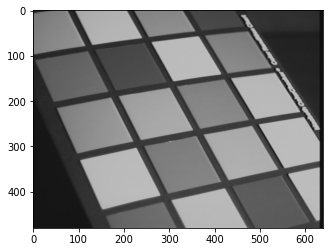

True
--------------------------------------------------
Edge Image:


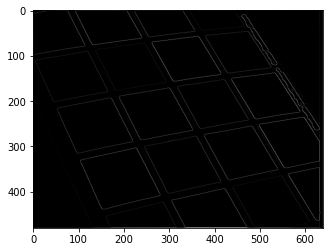

--------------------------------------------------
Thresholded Edge Image:


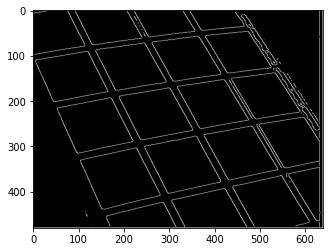

[  0   1   2 ... 637 638 639] [  0   0   0 ... 479 479 479]


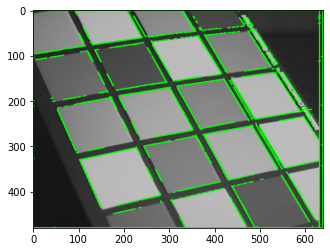

In [5]:
# TOY TEST!
# H = np.random.rand(5, 5)
# H_prime = hough_accumulator_nms(H)
# print(H); print(H_prime)

# Uncomment to visualize
# image_idx = np.random.randint(0, len(image_list))
image_idx = 0
visualize(image_list[image_idx], constants)
# hough_edge_points, non_hough_edge_points = visualize_line_segments(image_list[image_idx], constants, vis_image_rgb, rho_arr, theta_arr, peak_rho_arr, peak_theta_arr)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(480, 640, 3)
(480, 640, 3)
True
True
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


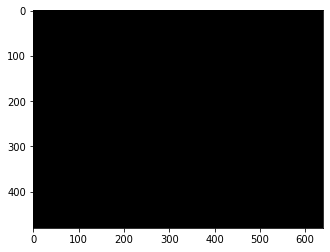

In [327]:
image_name = image_list[image_idx]
image_rgb = cv2.cvtColor(cv2.imread(image_name), cv2.COLOR_BGR2RGB)  
print(type(image_rgb))
print(type(vis_image_rgb))
print(image_rgb.shape)
# plt.imshow(image_rgb); plt.show()
print(hough_edge_points.shape)
print(np.all(hough_edge_points+non_hough_edge_points==np.ones_like(hough_edge_points)))
print(np.all(hough_edge_points==0))
vis_image_rgb = vis_image_rgb*hough_edge_points 
print(hough_edge_points)
# + image_rgb*non_hough_edge_points

plt.imshow(vis_image_rgb); plt.show()



### Test Q4.2

In [347]:
# YOUR CODE HERE
visualize_line_segments(image_list[8], constants)

TypeError: visualize_line_segments() missing 5 required positional arguments: 'vis_image_rgb', 'rho_arr', 'theta_arr', 'peak_rho_arr', and 'peak_theta_arr'

### Autograde Q4.1
0.5 points per test case, 10 test cases

(x1, y1) = (10, 10)
(x2, y2) = (15, 15)
(x3, y3) = (30, 30)
X = [10,15,30]
Y = [10,15,30]
x = np.arange(0,40,0.1)
y = x
plt.plot(x,y)
plt.plot(X, Y, 'r*')
# plt.axis([0, 6, 0, 20])

for i, j in zip(X, Y):
   plt.text(i, j+0.5, '({}, {})'.format(i, j))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Line connecting the 3 points')
plt.legend(['y=x'])  




(x1, y1) = (10, 10)
(x2, y2) = (15, 15)
(x3, y3) = (30, 30)

theta = np.arange(0,np.pi,0.1)
phi1 = np.arctan2(y1, x1)
phi2 = np.arctan2(y2, x2)
phi3 = np.arctan2(y3, x3)

A1 = 1/np.sqrt(x1**2 + y1**2)
A2 = 1/np.sqrt(x2**2 + y2**2)
A3 = 1/np.sqrt(x3**2 + y3**2)


rho1 = A1*np.sin(theta+phi1)
rho2 = A2*np.sin(theta+phi2)
rho3 = A3*np.sin(theta+phi3)

plt.plot(theta,rho1,theta, rho2,theta, rho3)
plt.xlabel('theta (rad)')  # string must be enclosed with quotes '  '
plt.ylabel('rho')
plt.title('Corresponding sinusoid waves for image points')
plt.legend(['(10, 10)', '(15, 15)', '(30, 30)'])  
x = [2.356]
y = [0]
# plt.xlim(0, 5)
# plt.ylim(0, 5)
plt.grid()
plt.plot(x, y, marker="o", markersize=5, markeredgecolor="black", markerfacecolor="black")
for i, j in zip(x, y):
   plt.text(i, j, '({}, {})'.format(i, j))
plt.show()